In [1]:
import astropy.units as u
import numpy as np
from noise_utils import *
import matplotlib.pyplot as plt

#### Part 2 Fractional Pixels

In [3]:
# Given data

pixel_size = 15 * u.micron

dark_current_rate = 3. / u.hour

read_noise = 3   #per pixel

sky_count_rate = 150  /u.s / u.arcsec**2

psf_fwhm = 1.4 * u.arcsec

focal_plane_scale = 16.5 * u.arcsec / u.mm

In [4]:
num_pixels = get_pix_num(focal_plane_scale=focal_plane_scale,psf_fwhm=psf_fwhm, pixel_size=pixel_size)

In [5]:
num_pixels

<Quantity 25.13017692>

### Problem 2

In [4]:
source_count_rate = 10  / u.s 

t_exps = np.arange(1, 60, 1) * u.s

num_pixels = get_pix_num(focal_plane_scale=focal_plane_scale,psf_fwhm=psf_fwhm, pixel_size=pixel_size)

In [5]:
params = {
    'source_count_rate': source_count_rate,
    'sky_count_rate': sky_count_rate,
    'read_noise': read_noise,
    'num_pixels': num_pixels,
    'num_pixels': num_pixels,
    'psf_fwhm': psf_fwhm,
}

snr_l, sky_noise_rate_l, total_signal_l, read_noise_rate_l, fractional_poisson_noise_l, fractional_sky_noise_l, fractional_read_noise_l = noise_simualations(params=params, t_exps=t_exps)

<Axes: title={'center': 'Noise Rates vs Exposure Time'}, xlabel='Exposure Time (s)', ylabel='Fractional Noise Rate Contributions'>

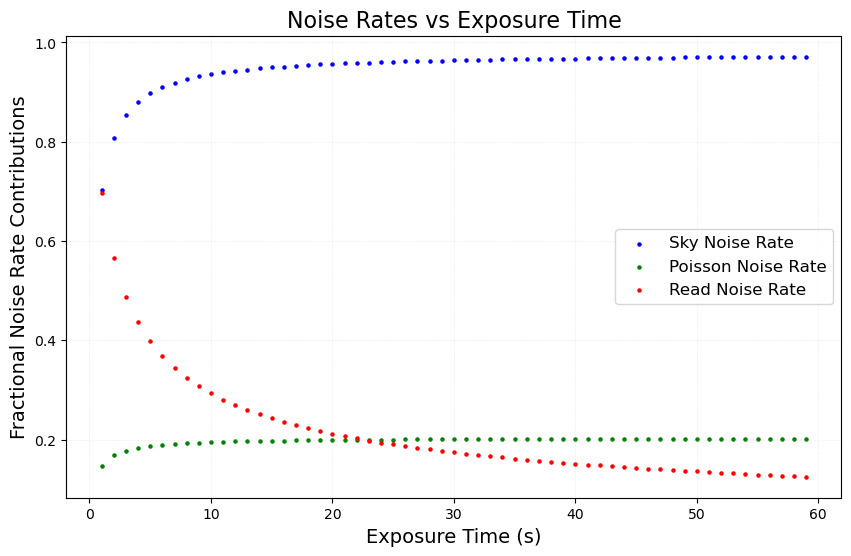

In [6]:
plot_noise_rates_vs_t_exps(t_exps, 
                           fractional_sky_noise_l=fractional_sky_noise_l,
                           fractional_poisson_noise_l=fractional_poisson_noise_l, 
                           fractional_read_noise_l=fractional_read_noise_l,
                           logy_scale=False)

#### Problem 3

In [7]:
source_count_rate_l = (np.arange(0,600,1)) /u.s
t_exp = 10 * u.s

params = {
    'sky_count_rate': sky_count_rate,
    'read_noise': read_noise,
    'num_pixels': num_pixels,
    't_exp': t_exp,
    'num_pixels': num_pixels,
    'psf_fwhm': psf_fwhm,

}

snr_l, sky_noise_rate_l, total_signal_l, read_noise_rate_l, fractional_poisson_noise_l, fractional_sky_noise_l, fractional_read_noise_l = noise_simualations(
    params=params,
    source_count_rate_l=source_count_rate_l,
    varying_qty='source_rate'
)

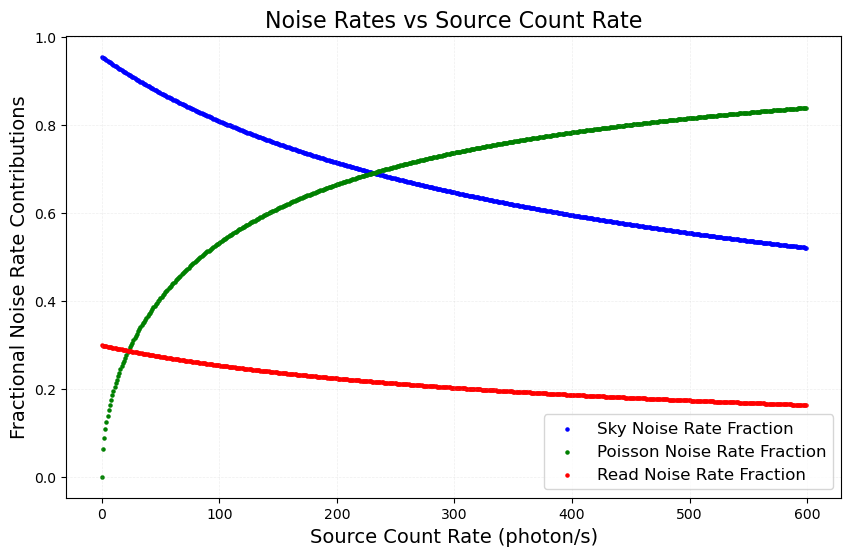

In [8]:
plot_noise_rates_vs_photon_rate(source_count_rate_l,
                                 fractional_sky_noise_l=fractional_sky_noise_l,
                                 fractional_poisson_noise_l=fractional_poisson_noise_l,
                                 fractional_read_noise_l=fractional_read_noise_l,
                                 )

### Part 3

#### The readnoise limit and why you want to avoid it.
Observation parameters:
• pixel size 15 microns (squares, 15 microns on a side)

• dark current rate 3 e-/pixel/hour

• readnoise 3 e-

• source count rate: 150 photons/second/

• Point source size PSF FWHM: 1.4 arcseconds

• focal plane scale 16.5 arcsec/mm

• sky count rate: 0 photons/second/arcsecond2

In [9]:
# Given data
t_exp = 600 * u.s
pixel_size = 15 * u.micron

dark_current_rate = 3. * u.electron / u.hour / u.pixel

read_noise = 3   #per pixel

sky_count_rate = 0  /u.s / u.arcsec**2

source_count_rate = 150  / u.s 


#### Problem 4

In [10]:
t_exps = np.arange(10, 250, 1) * u.s

In [11]:
params = {
    'source_count_rate': source_count_rate,
    'sky_count_rate': sky_count_rate,
    'read_noise': read_noise,
    'num_pixels': num_pixels,
    'num_pixels': num_pixels,
    'psf_fwhm': psf_fwhm,
}

snr_l, sky_noise_rate_l, total_signal_l, read_noise_rate_l, fractional_poisson_noise_l, fractional_sky_noise_l, fractional_read_noise_l = noise_simualations(params=params, t_exps=t_exps)

<Axes: title={'center': 'Noise Rates vs Exposure Time'}, xlabel='Exposure Time (s)', ylabel='Fractional Noise Rate Contributions'>

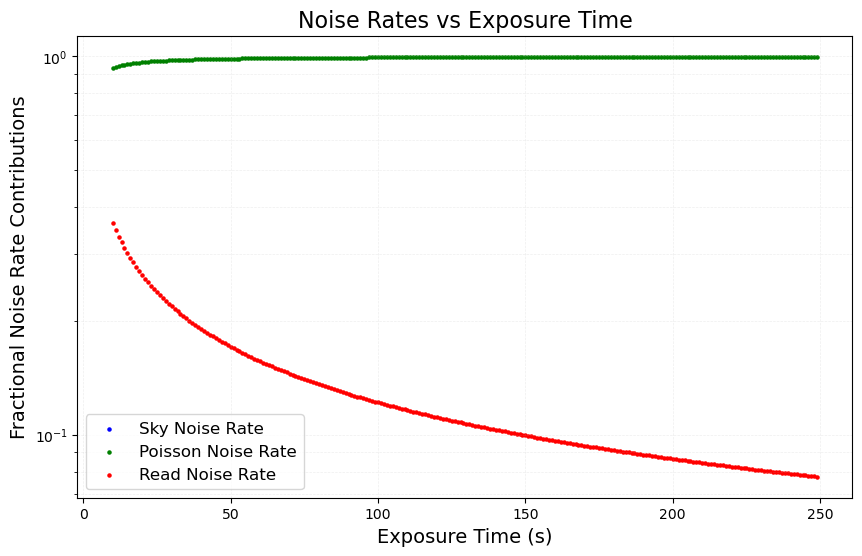

In [12]:
plot_noise_rates_vs_t_exps(t_exps, 
                           fractional_sky_noise_l=fractional_sky_noise_l,
                           fractional_poisson_noise_l=fractional_poisson_noise_l, 
                           fractional_read_noise_l=fractional_read_noise_l,
                           logy_scale=True)

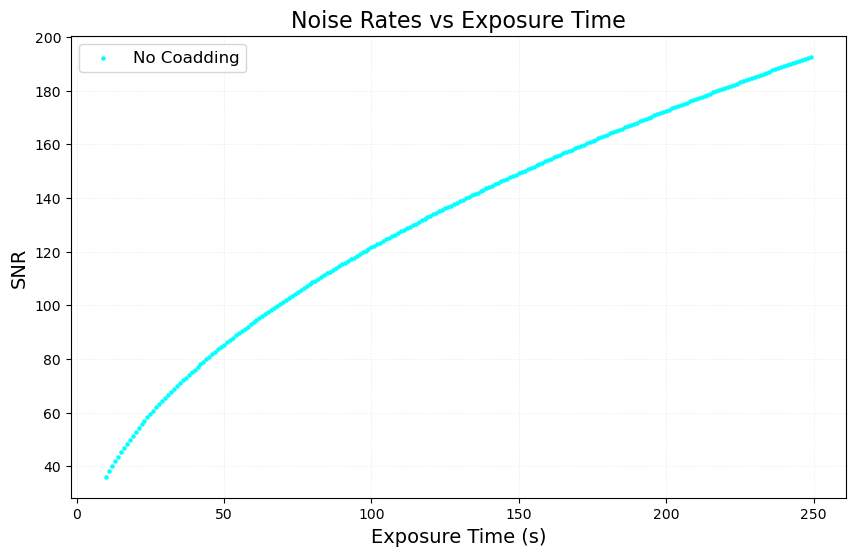

In [13]:
ax0 = plot_snr_vs_t_exps(t_exps, snr_l,lbl='No Coadding')

In [14]:
snr_l1, sky_noise_rate_l, total_signal_l, read_noise_rate_l, fractional_poisson_noise_l, fractional_sky_noise_l, fractional_read_noise_l = noise_simualations(params=params, t_exps=t_exps,num_coadds=2)

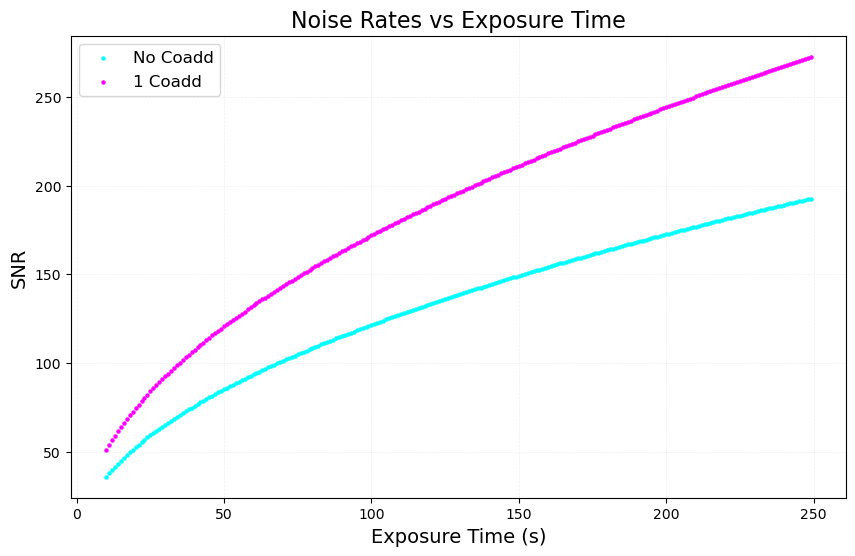

In [15]:
fig, ax = plt.subplots(figsize=(10, 6))
plot_snr_vs_t_exps(t_exps=t_exps,snr_l=snr_l, ax=ax,lbl='No Coadd')
plot_snr_vs_t_exps(t_exps=t_exps,snr_l=snr_l1, ax=ax, lbl='1 Coadd',ax_color='magenta')
plt.show()

In [16]:
snr_l3, sky_noise_rate_l, total_signal_l, read_noise_rate_l, fractional_poisson_noise_l, fractional_sky_noise_l, fractional_read_noise_l = noise_simualations(params=params, t_exps=2*t_exps,num_coadds=1)

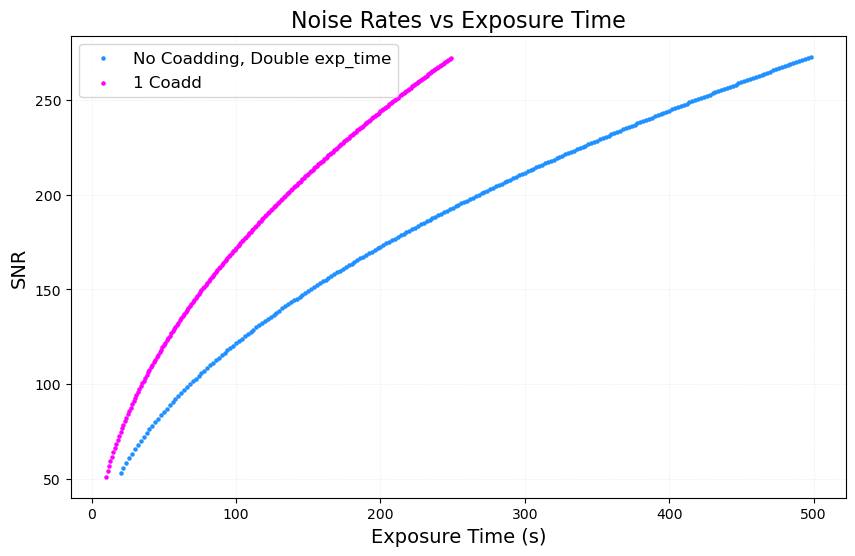

In [17]:
fig, ax = plt.subplots(figsize=(10, 6))
plot_snr_vs_t_exps(t_exps=2*t_exps,snr_l=snr_l3, ax=ax,ax_color='dodgerblue',lbl='No Coadding, Double exp_time')
plot_snr_vs_t_exps(t_exps=t_exps,snr_l=snr_l1, ax=ax, lbl='1 Coadd',ax_color='magenta')
plt.show()

<Axes: title={'center': 'Noise Rates vs Exposure Time'}, xlabel='Exposure Time (s)', ylabel='SNR'>

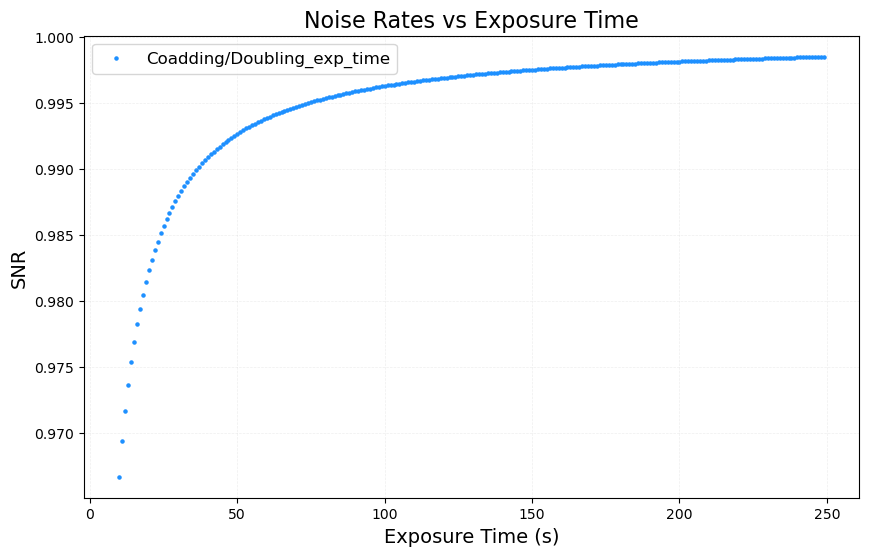

In [18]:
fig, ax = plt.subplots(figsize=(10, 6))
plot_snr_vs_t_exps(t_exps=t_exps,snr_l=np.array(snr_l1)/np.array(snr_l3), ax=ax,ax_color='dodgerblue',lbl='Coadding/Doubling_exp_time',set_logyscale=False)

In [19]:
sky_count_rate

<Quantity 0. 1 / (s arcsec2)>

In [21]:
sky_count_rate = 150  /u.s / u.arcsec**2
params = {
    'source_count_rate': source_count_rate,
    'sky_count_rate': sky_count_rate,
    'read_noise': read_noise,
    'num_pixels': num_pixels,
    'num_pixels': num_pixels,
    'psf_fwhm': psf_fwhm,
}

snr_l4, sky_noise_rate_l, total_signal_l, read_noise_rate_l, fractional_poisson_noise_l, fractional_sky_noise_l, fractional_read_noise_l = noise_simualations(params=params, t_exps=t_exps,num_coadds=2)
snr_l5, sky_noise_rate_l, total_signal_l, read_noise_rate_l, fractional_poisson_noise_l, fractional_sky_noise_l, fractional_read_noise_l = noise_simualations(params=params, t_exps=2*t_exps,num_coadds=1)

<Axes: title={'center': 'Noise Rates vs Exposure Time'}, xlabel='Exposure Time (s)', ylabel='SNR'>

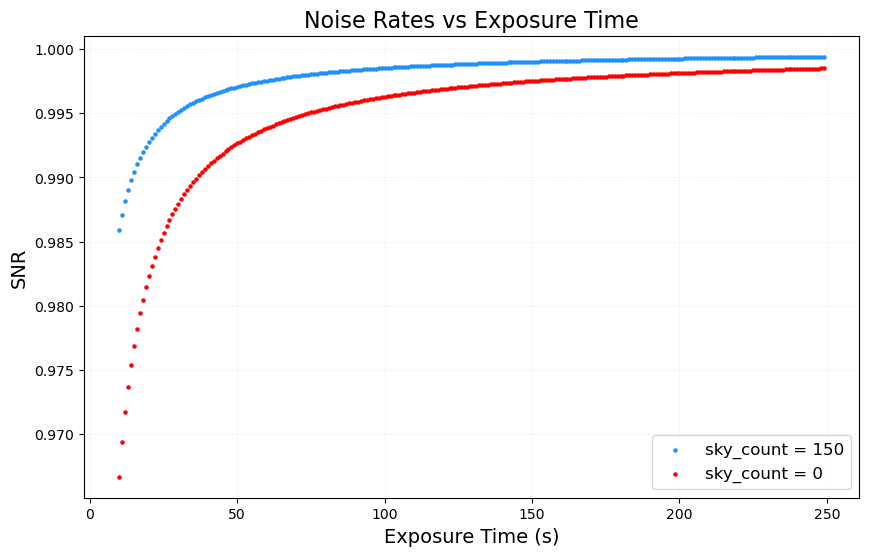

In [23]:
fig, ax = plt.subplots(figsize=(10, 6))
plot_snr_vs_t_exps(t_exps=t_exps,snr_l=np.array(snr_l4)/np.array(snr_l5), ax=ax,ax_color='dodgerblue',lbl='sky_count = 150',set_logyscale=False)
plot_snr_vs_t_exps(t_exps=t_exps,snr_l=np.array(snr_l1)/np.array(snr_l3), ax=ax,ax_color='red',lbl='sky_count = 0',set_logyscale=False)